In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader as api

In [2]:
Glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [3]:
Glove_model["tree"]

array([-5.6435e-01, -1.2970e-01,  1.4408e-01, -4.4019e-01, -3.3668e-01,
        4.9639e-01, -5.3135e-02,  2.2653e-01,  1.0723e-01, -7.8894e-01,
       -3.9606e-01,  7.9084e-01, -8.4203e-02, -5.1866e-02, -1.6708e-01,
        1.8568e-01, -4.0810e-01, -5.2432e-02, -4.2302e-01,  2.3911e-01,
        1.5259e-02,  1.9099e-01,  2.6818e-01,  6.3034e-02, -6.2153e-02,
       -1.0055e-01, -4.9126e-01, -4.1792e-01, -6.2518e-01,  8.9887e-01,
        8.0241e-02,  3.5060e-01, -6.1316e-01, -2.8336e-02, -2.8215e-01,
        1.2444e-01,  8.4797e-01, -3.5754e-01, -3.7787e-01, -3.6796e-01,
       -3.6041e-01,  1.2594e-01, -6.3622e-02, -2.6109e-01, -1.7909e-01,
       -3.3260e-01,  7.3833e-01,  5.9869e-02,  2.5457e-01,  1.3121e-01,
       -1.9318e-01, -5.8859e-01, -2.3607e-01, -2.9464e-01, -4.9118e-01,
       -1.1710e-01, -3.7903e-01, -1.7793e-01,  4.8562e-01,  7.4358e-02,
       -7.6378e-02, -1.2283e-01,  3.9954e-01,  8.1144e-01, -2.2988e-01,
       -2.3313e-01, -6.2379e-02,  9.2813e-01, -3.9347e-02,  3.00

In [4]:
Glove_model.most_similar("flower")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('flowers', 0.7001290321350098),
 ('petals', 0.5507512092590332),
 ('floral', 0.5470587015151978),
 ('blossoms', 0.5127416849136353),
 ('fruit', 0.501261293888092),
 ('flowering', 0.5010756850242615),
 ('roses', 0.5008190870285034),
 ('buds', 0.49074745178222656),
 ('blooms', 0.47430333495140076),
 ('lavender', 0.47190049290657043)]

In [5]:
Glove_model.most_similar(positive=['feminine', 'boy'], negative=['girl'], topn=1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('masculine', 0.7766413688659668)]

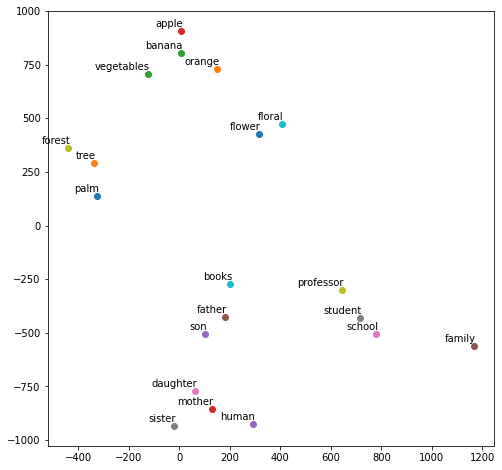

In [11]:
vocab = ["flower", "tree", "vegetables", "mother", "son", "father", "daughter", "sister", "forest", "floral", "palm","orange", "banana", "apple","human","family","school","student","professor","books"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=2, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(Glove_model)